<h1 align="center">Física Computacional.</h1>
<h1 align="center">Semestre 2025-2</h1>

<h2>Evelyn Venegas Agustín</h2> 

---
### Profesor Sergio Alcalá Corona
Práctica 4
---

#### Ejercicio 1. Regla del Trapecio

Usaremos la fórmula

$$ I \approx \frac{h}{2}(f(a)+f(b)) + h \sum^{N-1}_{k=1} f(a+kh) $$

Sin embargo, es importante resaltar que como no tenemos la función de forma explícita, en lugar de que enter una función matemática para nuestro cálculo, f será un arreglo. Podría definirse de forma general, pero para hacer más eficiente el código, como nuestro archivo está numerado del 0 al 100, usaremos los índices como si evaluásemos en la función.

In [ ]:
#Primero vamos a definir la regla del trapecio como función

def trapecio(f,a,b,N):
#donde f es la función a integrar, a y b son los límites de integración y h es el tamaño de la partición
    h=(b-a)/N #definción de h
    suma=0
    for k in range(1,N):
        suma+=f[int(a+k*h)]
    
    I=(h/2)*((f[int(a)]+f[int(b)])+h*suma)
    return I

#ahora vamos a abrir el archivo, a leerlo y guardar su contenido en 2 arrays
v=[]
t=[]

archivo=open("velocidades.txt","r")
for linea in archivo:
    columna=linea.split()
    t.append(float(columna[0]))
    v.append(float(columna[1]))

Para encontrar la distancia recorrida, debemos encontrar la integral de la función, es decir el área bajo la curva. Para ello, usaremos la regla del trapecio. Sin embargo,  convenientemente, elegiremos una partición del tamaño del espacio entre los datos del archivo, es decir, 1 segundo. 

In [10]:
print("La distancia recorrida (aproximadamente) fue de ", trapecio(v, 0, 100, 100), "metros")
archivo.close()

La distancia recorrida (aproximadamente) fue de  4.19378900000001 metros


Ahora, graficamos

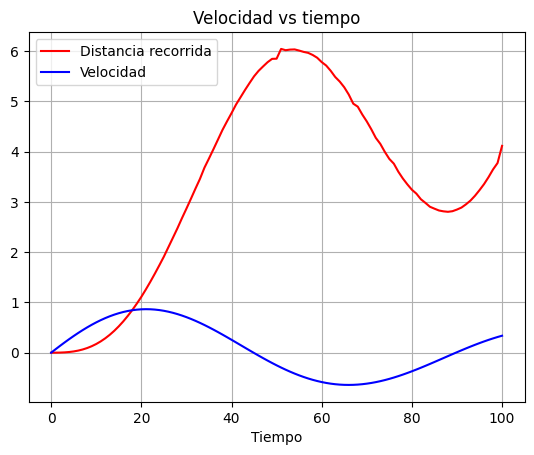

In [ ]:
import matplotlib.pyplot as plt

#vamos a crear un arreglo vacío para aque ahí se guarden los valores de la integral
d=[] #distancia
d.append(0) #la distancia inicial es 0

for i in range(1,len(v)):
    d.append(trapecio(v,0,i,len(v)))
#y en la misma gráfica ponemos esta curva
plt.plot(t,d, label="Distancia recorrida", color="red")
plt.legend()
plt.plot(t,v, label="Velocidad", color="blue")
plt.legend()
plt.title("Velocidad vs tiempo")
plt.xlabel("Tiempo")
plt.grid()
plt.show()

#### Ejercicio 2

a) Usaremos la regla de Simpson

$$ \int^{b}_{a} f(x) dx \approx \frac{1}{3}h [f(a)+f(b)+4 \sum^{N-1}_{k pares} f(a+kh) +2 \sum^{N-2}_{k impares} (a+kh)]$$

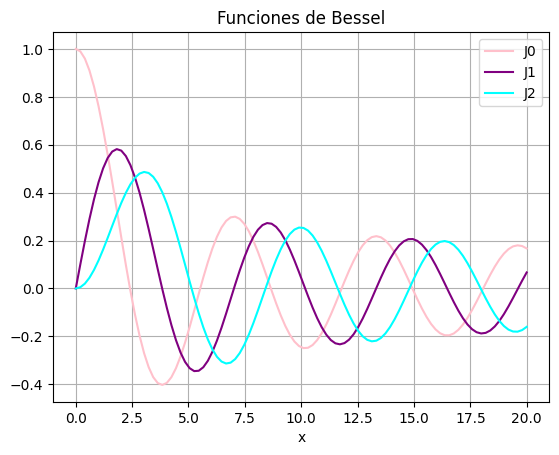

In [11]:
import numpy as np
import matplotlib.pyplot as plt
#Primero definamos nuestra función de manera análoga al ejercicio anterior

def simpson(f, a, b, N):
    h = (b-a)/N
    suma_pares=0
    suma_impares=0
    for k in range(2,N,2):
        suma_pares += f(a+k*h)
    for k in range(1,N,2):
        suma_impares += f(a+k*h)
    I = (h/3)*(f(a)+f(b)+4*suma_impares+2*suma_pares)
    return I

#ahora como las funciones de bessel tienen varias variables a calcular, vamos una a una

x = np.linspace(0,20,100)  #primero x

def J(m,x):  #y para cada x vamos a hacer la integral
    t = np.linspace(0,np.pi, 000)
    Jm = []
    for xi in x:
        integral = simpson(lambda t: np.cos(m * t - xi * np.sin(t)), 0, np.pi, 1000)
        #aquí usé la función lambda porque sin ella no funcionaba mi código,
        #porque detectaba error de tipo. Investigué y lambda es para definir una función anónima
        #es decir una función que no tiene nombre, para funciones que se van a usar una sola vez
        Jm.append(1 / np.pi * integral)
    return np.array(Jm)  # Devolver un array numpy

# Calculamos las funciones J0, J1 y J2
J0 = J(0, x)
J1 = J(1, x)
J2 = J(2, x)

# Una vez que tenemos estos arrays, vamos a graficar
plt.plot(x, J0, label="J0", color="pink")
plt.plot(x, J1, label="J1", color="purple")
plt.plot(x, J2, label="J2", color="cyan")
plt.title("Funciones de Bessel")
plt.xlabel("x")
plt.legend()
plt.grid()
plt.show()


b) Ahora comparamos los resultados con los que nos da scipy

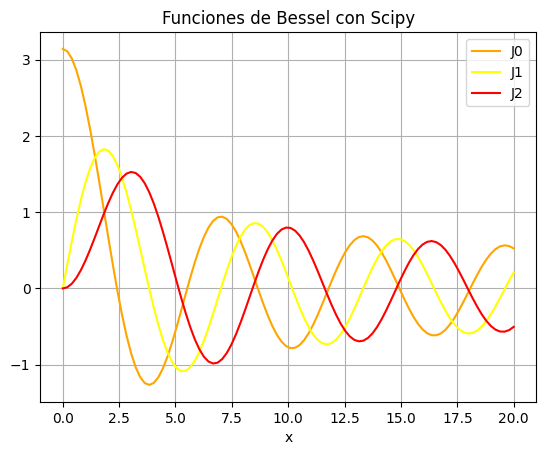

In [23]:
import numpy as np
import scipy.integrate as spi
import matplotlib.pyplot as plt

#ahora comparamos con los resultados que nos da scipy

x = np.linspace(0, 20, 100) #como antes, generamos las x

#y los arrays vacíos para cada polinomio
J0 = []
J1 = []
J2 = []

#como la función simpson recibe un array como función, vamos a generarlo
#definimos los límites de integración
t = np.linspace(0, np.pi, 1000)

for xi in x:
    #y aquí generamos el array que le vamos a dar a la función de scipy
    y0=np.cos(0*t-xi*np.sin(t))
    y1=np.cos(1*t-xi*np.sin(t))
    y2=np.cos(2*t-xi*np.sin(t))
    
    #usamos la funcion de scipy con y_i y theta (t)
    J0.append(spi.simpson(y0, t))
    J1.append(spi.simpson(y1, t))
    J2.append(spi.simpson(y2, t))

#y graficamos!
plt.plot(x, J0, label="J0", color="orange")
plt.plot(x, J1, label="J1", color="yellow")
plt.plot(x, J2, label="J2", color="red")
plt.title("Funciones de Bessel con Scipy")
plt.xlabel("x")
plt.legend()
plt.grid()
plt.show()


Vemos que las formas son muy similares, pero la función de scipy tiene mayor amplitud por que nosotros dividimos entre 3 al definir la función

c) Escribe un segundo programa que haga una gráfica de densidad (*density plot*) de la intensidad del patrón de difracción circular de una fuente de luz puntual con:

- **Longitud de onda**: λ = 500 nm  
- **Región**: Una región cuadrada del plano focal.  

usando la fórmula
$$ I(r) = (\frac{J_1(kr)}{kr})^2 $$

para este cálculo.  La imagen debe cubrir valores de **r** desde:
- **0 μm** hasta **1 μm**.


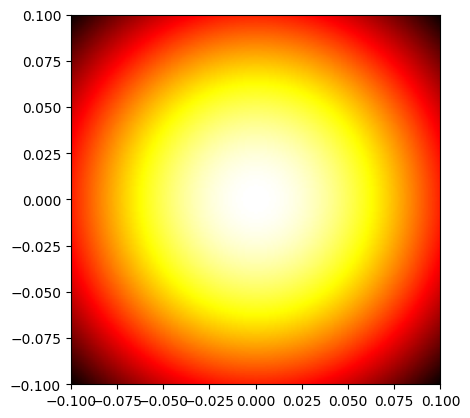

In [ ]:
import numpy as np
from scipy.special import j1 #por cuestiones de optimización, no usaremos la función que nosotros programamos
from pylab import imshow, show, hot

#primero calculemos k
k=2*np.pi/0.5  #con 0.5 la longitud de onda en micrómetros

#como I es una función radial, tenemos que hacer el cambio de coordenadas a polares
#para ello, definimos primero una "cuadrícula" en cartesianas

x = np.linspace(-0.1, 0.1, 200)  
y = np.linspace(-0.1, 0.1, 200)
X, Y = np.meshgrid(x, y)

r = np.sqrt(X**2+Y**2)  #y definimos la r polar

J1 = j1(k*r)

#sin embargo, si x=y=0 tenemos un problema de división entre 0
#por lo que vamos a definir I de manera diferente en ese punto

I = np.zeros_like(r) #inicializamos I en 0 para todos los puntos

if r.any()>0: #sin ese .any mandaba error -.-'
    I = (J1 / (k * r))**2  # Intensidad para r > 0
else:
    I = (j1(0) / k)**2

#y graficamos
imshow(I, origin="lower", extent=[-0.1, 0.1, -0.1, 0.1])
hot()
show()

#### Ejercicio 3

a) Nos dicen que la capacidad calorífica se calcula como:

$$ C_V = 9V \rho k_B (\frac{T}{\theta_D})^3 \int^{\frac{\theta_D}{T}}_0 \frac{x^4 e^x}{(e^x-1)^2} dx $$

In [ ]:
import numpy as np

#primero definimos nuestras constantes dadas
V = 0.001  #m^3
rho = 6.022e28  #m^-3
k_B = 1.380649e-23  #J/K
theta_D = 428  #K
N = 50

#pediremos al usuario que nos de la temperatura deseada
T = float(input("Introduce la temperatura deseada en grados Kelvin: "))

#y como en prácticas anteriores, revisemos que es un número positivo
while T<0:
    print("La temperatura no puede ser negativa")
    T = input("Introduce la temperatura deseada en grados Kelvin: ")

#definimos la función que calculará la integral, como hicimos en clase, con la función de numpy

def integral(f,a,b,N):
    x,w=np.polynomial.legendre.leggauss(N)
    xp=(b-a)*0.5*x+(b+a)*0.5
    wp=(b-a)*0.5*w
    integral=0
    for i in range(N):
        integral+=wp[i]*f(xp[i])
    return integral

#así, calculamos Cv

Cv=9*V*rho*k_B*(T/theta_D)**3*integral(lambda x: x**4*np.exp(x)/(np.exp(x)-1)**2,0,theta_D/T,N)
#aquí volvimos a usar la función lambda para que funcionara el programa
print("El calor específico de esta muestra de aluminio a", T, "K es de", Cv, "J/K")

El calor específico de esta muestra de aluminio a  100.0 K es de 1153.2637611460718 J/K


b) Ahora, generaremos una función que vaya desde T=5K hasta T=500K

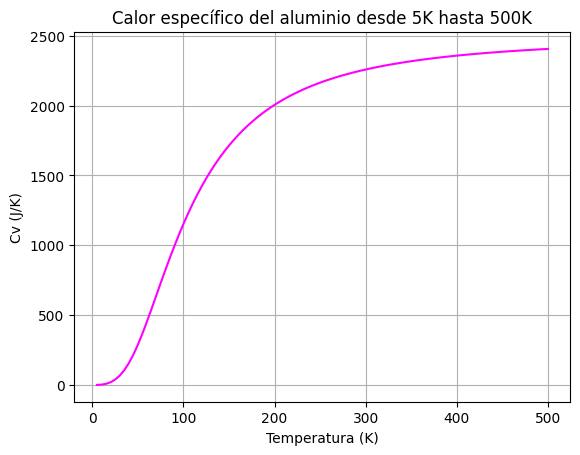

In [4]:
import matplotlib.pyplot as plt

#repetimos el cálculo para este intervalo de temperaturas
Temps = np.linspace(5,500,100)
Cv = []

#llenamos el arreglo
for t in Temps:
    Cv.append(9*V*rho*k_B*(t/theta_D)**3*integral(lambda x: x**4*np.exp(x)/(np.exp(x)-1)**2,0,theta_D/t,N))

#y graficamos
plt.plot(Temps, Cv, color="magenta")
plt.title("Calor específico del aluminio desde 5K hasta 500K")
plt.xlabel("Temperatura (K)")
plt.ylabel("Cv (J/K)")
plt.grid()
plt.show()

#### Ejercicio 4

b) En el inciso anterior demostramos que 

$$ F_z=G \sigma_z \int^{L/2}_{L/2}\int^{L/2}_{L/2} \frac{dx dy}{(x^2 +y^2 + z^2)^{3/2}} $$

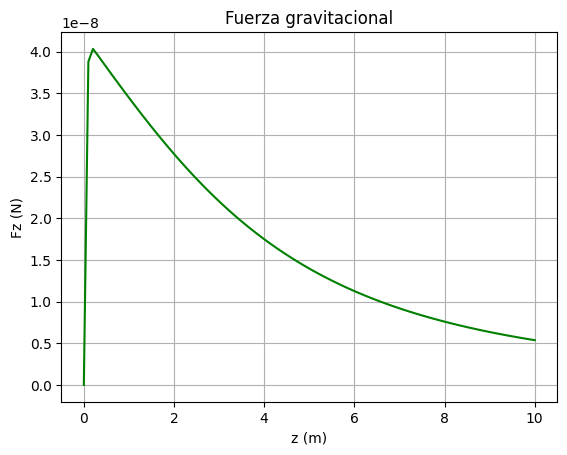

In [24]:
import numpy as np
import matplotlib.pyplot as plt

#primero definimos nuestras constantes
G= 6.67e-11  #m^3/kg/s^2
sigma= 100 #kg/m^2 pues nos dicen que la lámina tiene una masa de 10 toneladas y mide 10 metros de lado
#por lo que tiene un área de 100 m^2
N=100 
L1=10 #largo de la lámina
L2=10 #ancho

#ahora definimos una función muy similar a la del ejercicio anterior, pero esta vez con cuadratura doble

def integral2D(f,a,b,c,d,N):
    #vamos a calcular los puntos y pesos para x y y
    x, wx = np.polynomial.legendre.leggauss(N)
    xp = 0.5*(b-a)*x+0.5*(b+a) 
    wxp = 0.5*(b-a)*wx

    y, wy = np.polynomial.legendre.leggauss(N)
    yp = 0.5*(d-c)*y+0.5*(d+c) 
    wyp = 0.5*(d-c)*wy 

    #y vamos a hacer la doble sumatoria
    integral=0
    for i in range(N):
        for j in range(N):
            integral += wxp[i]*wyp[j]*f(xp[i],yp[j])  # Suma ponderada

    return integral

#creamos nuestro intervalo de z y el array que contendrá los valores para la gráfica

z=np.linspace(0,10,100) #m
Fz=[]

for zi in z: 
    Fz.append(G*sigma*zi*integral2D(lambda x,y: (1/np.sqrt((x**2+y**2+zi**2)**3)),-L1/2,L1/2,-L2/2,L2/2,N))

#y graficamos
plt.plot(z,Fz, color="green")
plt.title("Fuerza gravitacional")
plt.xlabel("z (m)")
plt.ylabel("Fz (N)")
plt.grid()
plt.show()

c) veamos que lo que pasa cuando estamos muy cerca de valores pequeños de z es que hay una caída rápida hacia el cero, lo cual no corresponde con lo que el modelo teórico nos dice. Al inicio creí que era por el número de particiones pero si graficamos solo los puntos cerca de la singularidad, vemos que el error persiste

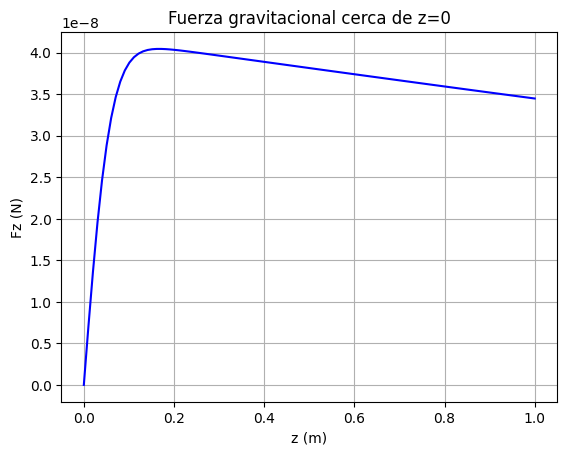

In [28]:
#grafiquemos solo los puntos cercanos al z=0

z=np.linspace(0,1,100) #m
Fz=[]
for zi in z:
    Fz.append(G*sigma*zi*integral2D(lambda x,y: (1/np.sqrt((x**2+y**2+zi**2)**3)),-L1/2,L1/2,-L2/2,L2/2,N))

plt.plot(z,Fz, color="blue")
plt.title("Fuerza gravitacional cerca de z=0") 
plt.xlabel("z (m)")
plt.ylabel("Fz (N)")
plt.grid()
plt.show()

Entonces, definitivamente el error está en cómo funciona polynomial.legendre.leggauss. Investigando como funciona, vemos que quizá el error está en que como los valores pequeños están dividiendo, el método pierde precisión cerca de estos. Esto quizá se pueda solucionar considerando un tipo de dato más grande, como double o long double. O quizá adaptando la función legauss para funciones con singularidades, como esta